#Dataset

In [ ]:
!git clone "https://github.com/Sumit189/Audio-Classification-Using-CNN.git"

Cloning into 'Audio-Classification-Using-CNN'...
remote: Enumerating objects: 760, done.
remote: Total 760 (delta 0), reused 0 (delta 0), pack-reused 760
Receiving objects: 100% (760/760), 674.65 MiB | 15.53 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (724/724), done.


In [ ]:
!mv /content/Audio-Classification-Using-CNN/dataset /content/

In [ ]:
!ls dataset/Dove/    | wc -l
!ls dataset/Koel/    | wc -l
!ls dataset/Owl/     | wc -l

240
240
240


#Data Preprocessing

In [ ]:
!pip install pydub

In [ ]:
from os import path
from pydub import AudioSegment
import os

In [ ]:
path='dataset/Dove/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
path='dataset/Koel/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
path='dataset/Owl/'
for r,d,f in os.walk(path):
  for file in f:
    file_name=file.split('.')
    src = r+file
    dst = r+file_name[0]+".wav"                                                       
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    os.remove(r+file)

In [ ]:
!ls dataset/Dove/*.wav    | wc -l
!ls dataset/Koel/*.wav    | wc -l
!ls dataset/Owl/*.wav     | wc -l

240
240
240


In [ ]:
import pandas as pd

In [ ]:
import os
i=0
f_name=[]
label=[]
path='/content/dataset/Dove/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('dove')

In [ ]:
path='/content/dataset/Koel/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('koel')

In [ ]:
path='/content/dataset/Owl/'
for r,d,f in os.walk(path):
  for file in f:
    f_name.append(file)
    label.append('owl')

In [ ]:
df= pd.DataFrame(list(zip(f_name,label)), 
               columns =['fname','label']) 

In [ ]:
df

,fname,label
0,243621_XC243621-Hohltaube%201.wav,dove
1,409260_XC409260-Default%20Project.wav,dove
2,269762_XC269762-Columba%20150718_031%2CA1.wav,dove
3,387812_XC387812-31525-10%C2%B4%20mp3.wav,dove
4,540140_XC540140-COLOEN2020-03-29_mp3.wav,dove
...,...,...
715,166883_XC166883-Megapodius_geelvinkianus-FL%20...,owl
716,45625_Helmeted%20Guineafowl%20RV%202-09.wav,owl
717,392669_XC392669-LS106108%20Cape%20Francolin%20...,owl
718,118436_XC118436-6_Helmeted_Guineafowl_Xanadu_2...,owl


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df

,fname,label
122,92264_Duif100421-05xc.wav,dove
248,576721_XC576721-Koel%2C%20Asian_2019-03-22_180...,koel
630,323344_XC323344-Spurfowl%20Natal_Mjejane_16061...,owl
306,194196_XC194196-B2A_AsianKoelSubic210_SDW.wav,koel
243,182810_XC182810-Asian%20Koel.wav,koel
...,...,...
121,314289_XC314289-VOC_160430-1189_CO.wav,dove
316,531611_XC531611-asian%20koel.wav,koel
258,330496_XC330496-Asian%20koel.wav,koel
591,347001_XC347001-LS102540%20Red-eyed%20Bulbul%2...,owl


In [ ]:
!mkdir alldataset

In [ ]:
!cp -r dataset/Dove/* alldataset/

In [ ]:
!cp -r dataset/Koel/* alldataset/

In [ ]:
!cp -r dataset/Owl/* alldataset/

In [ ]:
!ls alldataset/ | wc -l

720


In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=ba4903827599ca1552e15afe074778a0548d18442e86bd7bfc083b61a8503825
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc
import librosa
import keras
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Flatten,Activation
from keras.layers import Dropout, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [ ]:
def envelope(y,rate, threshold):
  mask=[]
  y = pd.Series(y).apply(np.abs)
  y_mean=y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
  for mean in y_mean:
    if mean>threshold:
      mask.append(True)
    else:
      mask.append(False)
  return mask

In [ ]:
df.set_index('fname',inplace=True)

In [ ]:
for f in df.index:
  rate, signal =  wavfile.read('alldataset/'+f)
  df.at[f, 'length'] = signal.shape[0]/rate

In [ ]:
df

,label,length
fname,,
92264_Duif100421-05xc.wav,dove,40.124082
576721_XC576721-Koel%2C%20Asian_2019-03-22_1807_SG_WCP.wav,koel,139.545918
323344_XC323344-Spurfowl%20Natal_Mjejane_160618_24_A.wav,owl,11.472000
194196_XC194196-B2A_AsianKoelSubic210_SDW.wav,koel,38.520000
182810_XC182810-Asian%20Koel.wav,koel,19.680000
...,...,...
314289_XC314289-VOC_160430-1189_CO.wav,dove,103.439002
531611_XC531611-asian%20koel.wav,koel,17.000000
330496_XC330496-Asian%20koel.wav,koel,5.537959


In [ ]:
classes= list(np.unique(df.label))

In [ ]:
class_dist = df.groupby(['label'])['length'].mean()

In [ ]:
class_dist

label
dove    48.937734
koel    37.985871
owl     40.227359
Name: length, dtype: float64

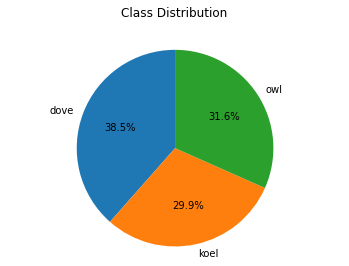

In [ ]:
fig,ax = plt.subplots()
ax.set_title('Class Distribution',y=1.08)
ax.pie(class_dist,labels=class_dist.index,autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [ ]:
!mkdir clean

In [ ]:
import numpy as np

In [ ]:
#Downsampling
if len(os.listdir('clean')) ==0:
  for f in tqdm(df.fname):
    signal, rate=librosa.load('alldataset/'+f,sr=16000)
    mask=envelope(signal,rate,0.0005)
    wavfile.write(filename='clean/'+f,rate=rate,data=signal[mask])

100%|██████████| 720/720 [24:45<00:00,  2.06s/it]


#Model 1

In [ ]:
!mkdir models
!mkdir pickles

In [ ]:
n_samples=2*int(df['length'].sum()/0.1)
prob_dist=class_dist/class_dist.sum()
choices=np.random.choice(class_dist.index,p = prob_dist)

In [ ]:
prob_dist

label
dove    0.384879
koel    0.298746
owl     0.316375
Name: length, dtype: float64

In [ ]:
import pickle

In [ ]:
class Config:
  def __init__(self,mode='conv',nfilt=26,nfeat=13,nfft=512,rate=16000):
    self.mode=mode
    self.nfilt=nfilt
    self.nfeat=nfeat
    self.nfft=nfft
    self.rate=rate
    self.step=int(rate/10)
    self.p_path=os.path.join('/content/pickles',mode+'.p')

In [ ]:
def check_data():
  if os.path.isfile(config.p_path):
    print("Loading existing mode")
    with open(config.p_path,'rb') as handle:
      tmp = pickle.load(handle)
      return tmp
  else:
    return None

In [ ]:
!mkdir pickles

mkdir: cannot create directory ‘pickles’: File exists


In [ ]:
def build_rand_feat():
  tmp=check_data()
  if tmp:
    return tmp.data[0], tmp.data[1]
  X=[]
  y=[]
  _min,_max=float('inf'),-float('inf')

  for _ in tqdm(range(n_samples)):
    rand_class=np.random.choice(class_dist.index,p=prob_dist)
    file=np.random.choice(df[df.label==rand_class].index)
    rate,wav=wavfile.read('clean/'+df.fname[file])
    label=df.at[file,'label']
    rand_index=np.random.randint(0,wav.shape[0]-config.step)
    sample=wav[rand_index:rand_index+config.step]
    X_sample = mfcc(sample,rate,numcep=config.nfeat,nfilt=config.nfilt,nfft=config.nfft)
    _min=min(np.amin(X_sample), _min)
    _max=max(np.amax(X_sample), _max)
    X.append(X_sample)
    y.append(classes.index(label))

  config.min=_min
  config.max=_max

  X, y = np.array(X), np.array(y)
  X=(X-_min)/(_max-_min)

  X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

  y=to_categorical(y,num_classes=3)
  config.data=(X,y)

  with open(config.p_path,'wb') as handle:
    pickle.dump(config,handle,protocol=2)
    
  return X,y

In [ ]:
x,y=build_rand_feat()
y_flat=np.argmax(y,axis=1)
input_shape=(x.shape[1],x.shape[2],1)

100%|██████████| 610324/610324 [29:18<00:00, 346.97it/s]


In [ ]:
np.save('x.npy', x) 

In [ ]:
np.save('y.npy', y) 

In [ ]:
!cp -r x.npy drive/My\ Drive/
!cp -r y.npy drive/My\ Drive/

In [ ]:
def get_conv_model():
  model=Sequential()
  model.add(Conv2D(16, (3,3), activation='relu', strides=(1,1),
                   padding='same',input_shape=input_shape))
  model.add(Conv2D(32, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(Conv2D(128, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.summary()
  model.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [ ]:
model=get_conv_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 13, 16)         160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 13, 32)         4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 13, 64)         18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 13, 128)        73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 6, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0

In [ ]:
best_model_file = "best.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
# !mkdir /content/drive/My\ Drive/pklspec/

mkdir: cannot create directory ‘/content/drive/My Drive/pklspec/’: File exists


In [ ]:
# !mv pickles /content/drive/My\ Drive/pklspec/

In [ ]:
results = model.fit(x,y,epochs=50, batch_size=32,
          shuffle=True, validation_split=0.2, verbose=1,callbacks=[best_model])

Epoch 1/50
15259/15259 [==============================] - ETA: 0s - loss: 0.5190 - accuracy: 0.7796
Epoch 00001: val_accuracy improved from -inf to 0.83767, saving model to best.h5
15259/15259 [==============================] - 73s 5ms/step - loss: 0.5190 - accuracy: 0.7796 - val_loss: 0.3931 - val_accuracy: 0.8377
Epoch 2/50
15253/15259 [============================>.] - ETA: 0s - loss: 0.3820 - accuracy: 0.8457
Epoch 00002: val_accuracy improved from 0.83767 to 0.87911, saving model to best.h5
15259/15259 [==============================] - 73s 5ms/step - loss: 0.3820 - accuracy: 0.8457 - val_loss: 0.3104 - val_accuracy: 0.8791
Epoch 3/50
15259/15259 [==============================] - ETA: 0s - loss: 0.3318 - accuracy: 0.8687
Epoch 00003: val_accuracy improved from 0.87911 to 0.89252, saving model to best.h5
15259/15259 [==============================] - 73s 5ms/step - loss: 0.3318 - accuracy: 0.8687 - val_loss: 0.2806 - val_accuracy: 0.8925
Epoch 4/50
15251/15259 [===================

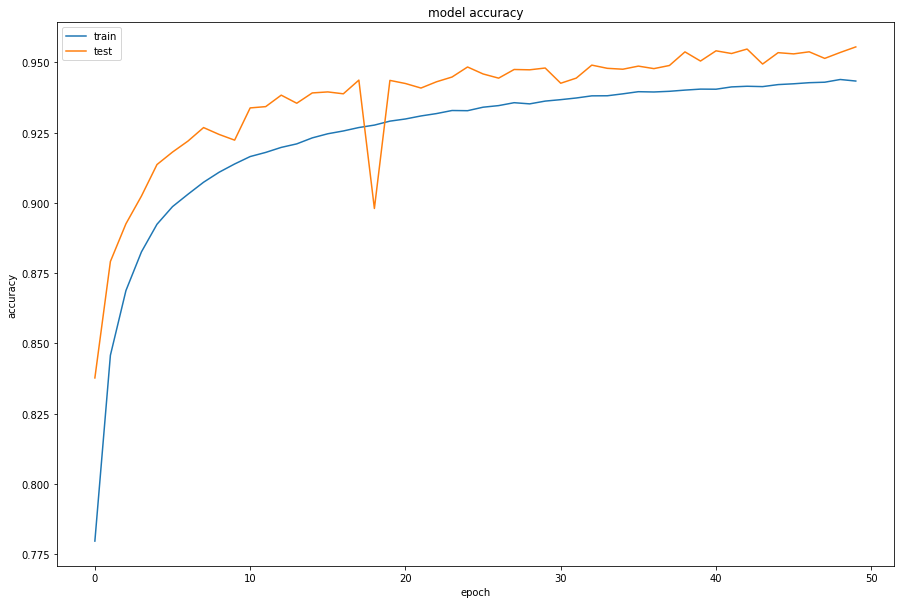

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

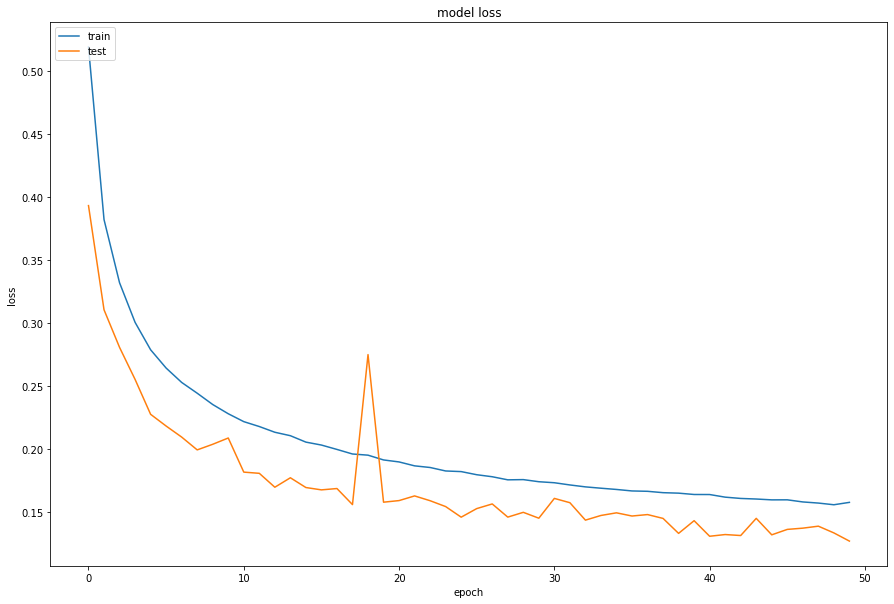

In [ ]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model("best.h5")
print(model.evaluate(x,y))

19073/19073 [==============================] - 49s 3ms/step - loss: 0.0934 - accuracy: 0.9680
[0.09337371587753296, 0.9679596424102783]


In [ ]:
!cp -r best.h5 /content/drive/My\ Drive/pklspec/

#Model 2


In [ ]:
num_classes = 3

model2 = Sequential()
model2.add(Conv2D(64, (3,3), activation='relu', strides=(1,1),
                   padding='same',input_shape=input_shape))
model2.add(Conv2D(32, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.7))
model2.add(Flatten())
model2.add(Dense(1000))
model2.add(Activation('relu'))
model2.add(Dropout(0.7))
model2.add(Dense(num_classes, activation='softmax'))


model2.compile(optimizer=keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 9, 13, 64)         640       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 13, 32)         18464     
_________________________________________________________________
activation_7 (Activation)    (None, 9, 13, 32)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 6, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)             

In [ ]:
best_model2_file = "best2.h5"
best_model2 = ModelCheckpoint(best_model2_file, monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
results2 = model2.fit(x,y,epochs=50, batch_size=32,
          shuffle=True, validation_split=0.2, verbose=1,callbacks=[best_model2])

Epoch 1/50
15248/15259 [============================>.] - ETA: 0s - loss: 0.6827 - accuracy: 0.6988
Epoch 00001: val_accuracy improved from -inf to 0.75257, saving model to best2.h5
15259/15259 [==============================] - 54s 4ms/step - loss: 0.6826 - accuracy: 0.6989 - val_loss: 0.5858 - val_accuracy: 0.7526
Epoch 2/50
15253/15259 [============================>.] - ETA: 0s - loss: 0.6161 - accuracy: 0.7344
Epoch 00002: val_accuracy improved from 0.75257 to 0.77620, saving model to best2.h5
15259/15259 [==============================] - 55s 4ms/step - loss: 0.6161 - accuracy: 0.7344 - val_loss: 0.5426 - val_accuracy: 0.7762
Epoch 3/50
15259/15259 [==============================] - ETA: 0s - loss: 0.5875 - accuracy: 0.7490
Epoch 00003: val_accuracy improved from 0.77620 to 0.79063, saving model to best2.h5
15259/15259 [==============================] - 55s 4ms/step - loss: 0.5875 - accuracy: 0.7490 - val_loss: 0.5170 - val_accuracy: 0.7906
Epoch 4/50
15247/15259 [================

In [ ]:
print(model2.evaluate(x,y))

19073/19073 [==============================] - 43s 2ms/step - loss: 0.3476 - accuracy: 0.8852
[0.34762707352638245, 0.8851577043533325]


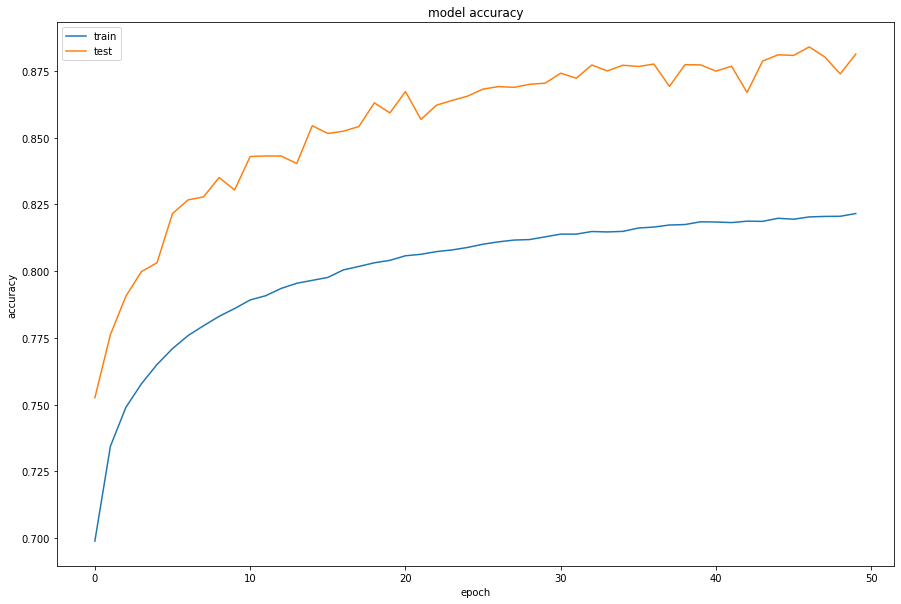

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

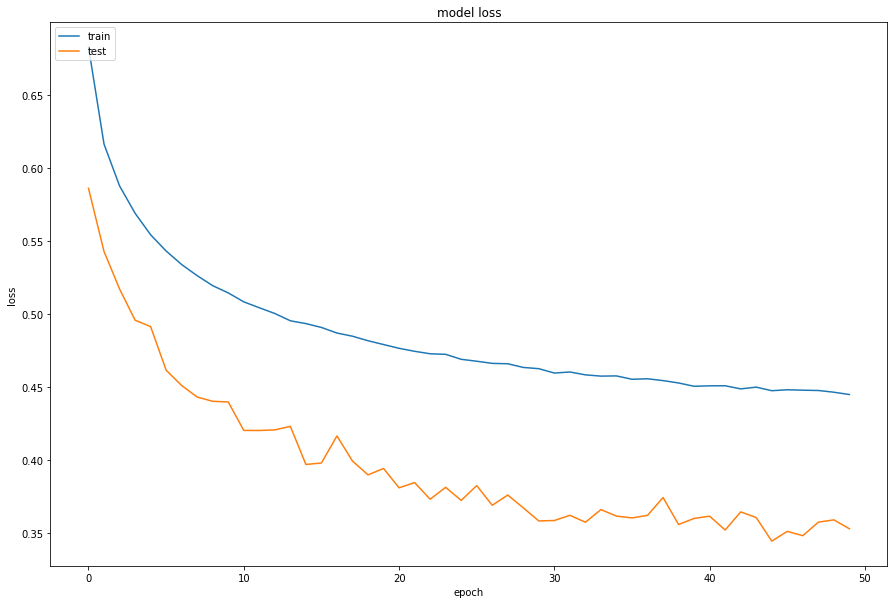

In [ ]:
# summarize history for loss
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!cp -r best2.h5 /content/drive/My\ Drive/pklspec/